In [67]:
import pandas as pd

STORE = "MONGODB"

IN_FILE = "out.csv" # if using CSV Store

data = None

if STORE == "MONGODB":
    import pymongo
    mongo_client = pymongo.MongoClient()
    mongo_db = mongo_client.tls_survey
    mongo_docs = mongo_db.sites.find({}, {'_id': 0}) # Get all entries but not the id
    data = pd.DataFrame(list(mongo_docs))
    
elif STORE == "CSV":
    data = pd.read_csv(IN_FILE)
    
print(f"Loaded {len(data.index)} entries")

Loaded 38222 entries


In [56]:
data

,answer_malformed,http_version,https,site,ssl_cipher,ssl_version
0,404IN,2,True,google.com,TLS_AES_256_GCM_SHA384,TLSv1.3
1,429,2,True,reddit.com,ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
2,404,1.1,True,varzesh3.com,ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
3,404,1.1,True,gmw.cn,ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
4,200,2,True,live.com,ECDHE-RSA-AES256-GCM-SHA384,TLSv1.2
5,404,2,True,youtube.com,TLS_AES_256_GCM_SHA384,TLSv1.3
6,404IN,2,True,facebook.com,TLS_CHACHA20_POLY1305_SHA256,TLSv1.3
7,404IN,2,True,wikipedia.org,ECDHE-ECDSA-CHACHA20-POLY1305,TLSv1.2
8,404,1.1,True,amazon.com,ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
9,404IN,2,True,yahoo.com,ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2


In [59]:
data_https = data.loc[data['https']]
data_http = data.loc[data["https"] == False]

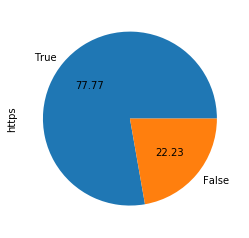

In [60]:
data["https"].value_counts().plot.pie(autopct='%.2f');

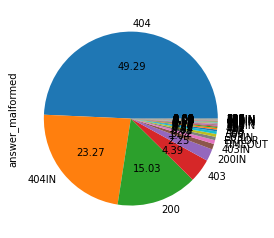

In [61]:
data_https["answer_malformed"].value_counts().plot.pie(autopct='%.2f');

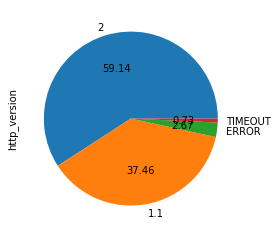

In [62]:
data_https["http_version"].value_counts().plot.pie(autopct='%.2f');

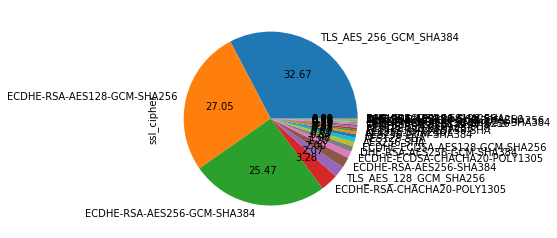

In [63]:
# Add TLS version
data_https["ssl_cipher"].value_counts().plot.pie(autopct='%.2f');

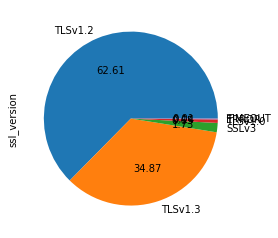

In [64]:
data_https["ssl_version"].value_counts().plot.pie(autopct='%.2f');

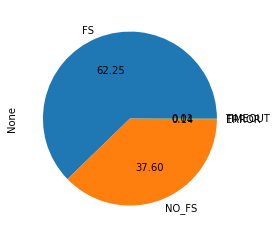

In [65]:
pd.Series(["FS" if "DHE" in x else x if x in ["ERROR", "TIMEOUT"] else "NO_FS" for x in data_https["ssl_cipher"]]).value_counts().plot.pie(autopct='%.2f');